In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import clear_output

# Clear previous output
clear_output(wait=True)

# Display the new output
print("New Output")


# Amazon Book

In [ ]:
#Ran model on Amazon-book with pretrained model to get these initial results 
amazon = {   "categories":["<=7", "<=15", "<=48", "<=4475", "All"],
    "recall":[
    [0.15202, 0.21597, 0.26033, 0.29410, 0.32154],
    [0.11909, 0.18290, 0.22878, 0.26543, 0.29626],
    [0.07871, 0.13337, 0.17622, 0.20970, 0.23955],
    [0.04057, 0.07202, 0.10067, 0.12535, 0.14640],
    [0.13043, 0.19235, 0.23656, 0.27090, 0.29946],
],
"precision":[
    [0.01132, 0.00804, 0.00646, 0.00548, 0.00480],
    [0.01394, 0.01075, 0.00899, 0.00782, 0.00699],
    [0.02029, 0.01734, 0.01531, 0.01373, 0.01259],
    [0.03404, 0.03108, 0.02916, 0.02750, 0.02591],
    [0.01379, 0.01058, 0.00889, 0.00776, 0.00695],
],
"hit":[
    [0.20399, 0.28197, 0.33446, 0.37270, 0.40358],
    [0.23367, 0.34104, 0.40982, 0.45929, 0.49981],
    [0.29660, 0.44051, 0.52673, 0.58149, 0.62841],
    [0.41158, 0.57143, 0.67339, 0.73394, 0.78226],
    [0.22952, 0.32636, 0.38907, 0.43323, 0.46937],
],
"ndcg":[
    [0.08875, 0.10582, 0.11622, 0.12349, 0.12922],
    [0.08839, 0.11229, 0.12749, 0.13858, 0.14764],
    [0.09111, 0.12600, 0.15009, 0.16790, 0.18336],
    [0.10053, 0.14792, 0.18565, 0.21694, 0.24326],
    [0.08924, 0.11130, 0.12551, 0.13582, 0.14427],
]}

In [ ]:
# Function to calculate mean of each column for a given metric
def calculate_mean_per_column(metric_data):
    return list(np.mean(metric_data, axis=0))

# Calculate means for all metrics
mean_metrics = {metric: calculate_mean_per_column(data) for metric, data in amazon.items() if metric != "categories"}

# Display the result
for metric, means in mean_metrics.items():
    print(f"Mean values for {metric}: {means}")

In [ ]:
pd.DataFrame(amazon['precision']).mean()

In [ ]:
user_groups = ["<=7", "<=15", "<=48", "<=4475"]  # User groups based on sparsity
ndcg_kgat = [0.08875, 0.10582, 0.11622, 0.12349]  # KGAT NDCG values for each group
density = [40, 30, 20, 10]  # Example density percentages for user groups

# Normalize density to percentages
density_normalized = [d / sum(density) * 100 for d in density]

In [ ]:

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the histogram for density
ax1.bar(user_groups, density_normalized, color='lightgreen', alpha=0.5, label="Density (%)")
ax1.set_ylabel("Density %", color="green")
ax1.set_ylim(0, max(density_normalized) + 10)
ax1.legend(loc="upper left")

# Add a line plot for KGAT NDCG@20
ax2 = ax1.twinx()
ax2.plot(user_groups, ndcg_kgat, color='red', marker='o', linewidth=2, label="KGAT NDCG@20")
ax2.set_ylabel("NDCG@20", color="red")
ax2.set_ylim(0.08, 0.13)
ax2.legend(loc="upper right")

# Add gridlines and labels
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("NDCG and Density Across User Groups (Amazon-Book, KGAT)")
plt.xlabel("User Group")

# Display the plot
plt.show()

# Taobao

In [4]:
users = {
    'categories':['<=5', '<=7','<=11','<=37', 'all'], 
    'amt':[4205,4054,2219,570,11048]
}

In [2]:
import re
import ast

In [1]:

alpha_1 = [{'precision': [0.00072864, 0.00069017, 0.00067131, 0.00065736, 0.00066618], 'recall': [0.01091449, 0.02102945, 0.03134051, 0.04076454, 0.05097001], 'ndcg': [0.00438342, 0.00697102, 0.00915844, 0.01109583, 0.01322935], 'hit_ratio': [0.01448226, 0.02742578, 0.03955467, 0.05114048, 0.06480811], 'auc': 0.5848901085193078},
{'precision': [0.00086441, 0.00084631, 0.00079803, 0.000749  , 0.00071416], 'recall': [0.01373099, 0.02709476, 0.03854479, 0.04784512, 0.0571907 ], 'ndcg': [0.00619082, 0.00950785, 0.01192798, 0.0138587 , 0.0156065 ], 'hit_ratio': [0.01710717, 0.03358074, 0.04706734, 0.05874366, 0.07005793], 'auc': 0.6273596253330509},
{'precision': [0.00102281, 0.00096624, 0.00092174, 0.00088817, 0.00085988], 'recall': [0.0167074 , 0.03082308, 0.04353277, 0.05526189, 0.06689295], 'ndcg': [0.00716293, 0.01079805, 0.01364949, 0.01611312, 0.01832729], 'hit_ratio': [0.02009413, 0.03801593, 0.05421796, 0.06870022, 0.08263939], 'auc': 0.6480416938149736},
{'precision': [0.00118573, 0.00115179, 0.00106052, 0.00098208, 0.00093863], 'recall': [0.01863384, 0.03678494, 0.05015086, 0.06173666, 0.07323196], 'ndcg': [0.00787029, 0.01225873, 0.01528078, 0.01767139, 0.01993541], 'hit_ratio': [0.02353367, 0.04480449, 0.06145909, 0.07603186, 0.09024258], 'auc': 0.6629630870056116},
{'precision': [0.00125362, 0.00119026, 0.00110578, 0.00103412, 0.00100471], 'recall': [0.02000362, 0.03757845, 0.05251328, 0.06547188, 0.07885676], 'ndcg': [0.00832316, 0.01279591, 0.01603537, 0.01863552, 0.02129467], 'hit_ratio': [0.02489138, 0.04670529, 0.06480811, 0.08046705, 0.09721217], 'auc': 0.6699172636298574},
{'precision': [0.0013034 , 0.00124004, 0.00112539, 0.00108504, 0.00104544], 'recall': [0.02010168, 0.0390674 , 0.05304731, 0.0678871 , 0.08141142], 'ndcg': [0.00910515, 0.01384254, 0.01694089, 0.0199568 , 0.02254185], 'hit_ratio': [0.0256155 , 0.0486966 , 0.06634685, 0.08426865, 0.10019913], 'auc': 0.676027343572434},
{'precision': [0.00146633, 0.00134187, 0.00123853, 0.0011846 , 0.00114772], 'recall': [0.02340846, 0.04226557, 0.05812063, 0.07417934, 0.08952902], 'ndcg': [0.01040218, 0.01520927, 0.01868741, 0.02188994, 0.02488133], 'hit_ratio': [0.02896452, 0.05249819, 0.07195873, 0.0910572 , 0.10970311], 'auc': 0.681071993236948},
{'precision': [0.00160663, 0.00143465, 0.00128983, 0.00121515, 0.00116582], 'recall': [0.02554007, 0.04524197, 0.06041365, 0.07518555, 0.09012038], 'ndcg': [0.01137798, 0.01632801, 0.01974561, 0.02283265, 0.02570343], 'hit_ratio': [0.03158943, 0.05602824, 0.07539826, 0.09386314, 0.11160391], 'auc': 0.6831787966624058},
{'precision': [0.00166093, 0.00145954, 0.00133056, 0.0012672 , 0.00123371], 'recall': [0.02592023, 0.04555425, 0.06271723, 0.07945782, 0.0960204 ], 'ndcg': [0.01164761, 0.01656074, 0.02023339, 0.02359493, 0.02684136], 'hit_ratio': [0.0326756 , 0.05675235, 0.07766112, 0.09784576, 0.11775887], 'auc': 0.6864202864037546},
{'precision': [0.00177408, 0.00151611, 0.00139543, 0.00129209, 0.00125181], 'recall': [0.02815743, 0.04769642, 0.06600591, 0.08040068, 0.0975531 ], 'ndcg': [0.01221096, 0.01709171, 0.02101933, 0.02405223, 0.02728309], 'hit_ratio': [0.03502896, 0.05919623, 0.08137219, 0.09902245, 0.11929761], 'auc': 0.6880279784674823},
{'precision': [0.00172429, 0.00151837, 0.00137732, 0.00129209, 0.00121108], 'recall': [0.02731565, 0.04774922, 0.06537684, 0.08179847, 0.09548873], 'ndcg': [0.01200973, 0.01709676, 0.02084011, 0.0241178 , 0.02674399], 'hit_ratio': [0.03403331, 0.05919623, 0.08028602, 0.09983707, 0.11612962], 'auc': 0.6903569148169006},
{'precision': [0.00181481, 0.001541  , 0.00143917, 0.00135205, 0.00128983], 'recall': [0.02906258, 0.04883991, 0.06815261, 0.08472725, 0.10080407], 'ndcg': [0.01326104, 0.01820875, 0.02242074, 0.02580423, 0.02893856], 'hit_ratio': [0.03602462, 0.06046343, 0.08408762, 0.10400072, 0.1237328 ], 'auc': 0.6924618238924249},
{'precision': [0.00186007, 0.00161341, 0.00146935, 0.00140636, 0.0013378 ], 'recall': [0.02961622, 0.05100859, 0.06902844, 0.08813446, 0.10482225], 'ndcg': [0.01302191, 0.01838624, 0.02239041, 0.02625298, 0.02939004], 'hit_ratio': [0.03665822, 0.06326937, 0.08544533, 0.10870746, 0.12798697], 'auc': 0.6932321745234802},
{'precision': [0.0019189 , 0.00165415, 0.00148896, 0.00144031, 0.00137853], 'recall': [0.03105992, 0.0520592 , 0.07026762, 0.08954045, 0.10746224], 'ndcg': [0.01415601, 0.01953541, 0.02349548, 0.02756066, 0.03092571], 'hit_ratio': [0.03801593, 0.06435554, 0.0865315 , 0.11060825, 0.13160753], 'auc': 0.6938419011788477},
{'precision': [0.00186459, 0.00164509, 0.00152969, 0.0014833 , 0.00140116], 'recall': [0.02955889, 0.05154952, 0.07174925, 0.09248754, 0.10915723], 'ndcg': [0.01389293, 0.01945381, 0.02387249, 0.02812137, 0.03131428], 'hit_ratio': [0.03692976, 0.06426503, 0.08879435, 0.11404779, 0.13387038], 'auc': 0.6945544221125095},
{'precision': [0.00196416, 0.00176729, 0.00161869, 0.00149461, 0.00141112], 'recall': [0.03102544, 0.05569808, 0.07593553, 0.0934651 , 0.11031581], 'ndcg': [0.01417982, 0.02026993, 0.02477702, 0.02830779, 0.03151336], 'hit_ratio': [0.0384685 , 0.06833816, 0.09350109, 0.11440985, 0.13441347], 'auc': 0.6971008224620882},
{'precision': [0.00193248, 0.00174466, 0.001584  , 0.00148896, 0.00143465], 'recall': [0.03063903, 0.05474445, 0.07457997, 0.09327868, 0.11223923], 'ndcg': [0.01444185, 0.02047652, 0.02484313, 0.02865048, 0.03228719], 'hit_ratio': [0.03792542, 0.06734251, 0.0916908 , 0.11450036, 0.13721941], 'auc': 0.6988254734435189},
{'precision': [0.00198678, 0.00174466, 0.00160813, 0.00151272, 0.00143827], 'recall': [0.03141896, 0.05435675, 0.07483643, 0.09437239, 0.11212825], 'ndcg': [0.01494863, 0.02080491, 0.02538795, 0.0292613 , 0.03266762], 'hit_ratio': [0.03892107, 0.06734251, 0.09268646, 0.11567705, 0.13712889], 'auc': 0.6992457692459279},
{'precision': [0.00205014, 0.00178765, 0.00163076, 0.00153987, 0.00148896], 'recall': [0.03201721, 0.05605927, 0.07642043, 0.09616845, 0.1164587 ], 'ndcg': [0.01488967, 0.02085794, 0.02532174, 0.02930166, 0.0331569 ], 'hit_ratio': [0.04018827, 0.06942433, 0.09413469, 0.11766836, 0.14192614], 'auc': 0.7012729291792958},
{'precision': [0.00212708, 0.00181481, 0.00164434, 0.00155119, 0.00148172], 'recall': [0.03331458, 0.05667326, 0.07711523, 0.09627944, 0.11492836], 'ndcg': [0.0153657 , 0.02116368, 0.02562195, 0.02958171, 0.03320647], 'hit_ratio': [0.0416365 , 0.07005793, 0.09449674, 0.1179399 , 0.14093049], 'auc': 0.7015893454160831},
{'precision': [0.00202299, 0.00180576, 0.00169714, 0.00157042, 0.00147085], 'recall': [0.0316808 , 0.05650732, 0.07916602, 0.09700355, 0.11400059], 'ndcg': [0.01493609, 0.02106322, 0.02608683, 0.02979128, 0.03299594], 'hit_ratio': [0.03982621, 0.06951484, 0.09730268, 0.11911658, 0.13930123], 'auc': 0.7024840867119926},
{'precision': [0.0020773 , 0.00184423, 0.00165188, 0.0015625 , 0.00147991], 'recall': [0.03264112, 0.05719911, 0.07672386, 0.09680291, 0.11470208], 'ndcg': [0.01484467, 0.02108974, 0.02539082, 0.02948199, 0.03287894], 'hit_ratio': [0.04018827, 0.07060101, 0.09494931, 0.11902607, 0.13984432], 'auc': 0.7048773053872776},
{'precision': [0.00214971, 0.00183065, 0.00172279, 0.00157042, 0.00150072], 'recall': [0.03402663, 0.05685429, 0.08002375, 0.09749297, 0.11561929], 'ndcg': [0.0153578 , 0.02122277, 0.02630052, 0.02978671, 0.03337438], 'hit_ratio': [0.04190804, 0.0705105 , 0.09893193, 0.11947864, 0.14147357], 'auc': 0.7043127230650341},
{'precision': [0.00223117, 0.00195284, 0.00175597, 0.00163491, 0.00154417], 'recall': [0.03454795, 0.06079252, 0.08231009, 0.10177817, 0.11995642], 'ndcg': [0.01580311, 0.02230726, 0.02690726, 0.03092648, 0.03444549], 'hit_ratio': [0.04326575, 0.07494569, 0.10038016, 0.12427589, 0.1461803 ], 'auc': 0.7055600089094783},
{'precision': [0.00217234, 0.00192343, 0.00175447, 0.00166999, 0.00155956], 'recall': [0.03389474, 0.06010612, 0.08195321, 0.10364492, 0.12096415], 'ndcg': [0.01510562, 0.02159918, 0.02637632, 0.03084453, 0.03414055], 'hit_ratio': [0.04217958, 0.07340695, 0.09983707, 0.12662925, 0.14699493], 'auc': 0.7072782163504008},
{'precision': [0.0022538 , 0.00193927, 0.00178011, 0.00166772, 0.00158128], 'recall': [0.03503802, 0.06007271, 0.08275943, 0.10371043, 0.12273887], 'ndcg': [0.01583488, 0.022071  , 0.02700389, 0.03119677, 0.03485863], 'hit_ratio': [0.04371832, 0.07385952, 0.10101376, 0.12617668, 0.14889573], 'auc': 0.7083838853335688},
{'precision': [0.0022538 , 0.00197547, 0.00180274, 0.00166999, 0.00156137], 'recall': [0.03496496, 0.06085501, 0.08386069, 0.10384038, 0.12105466], 'ndcg': [0.01612003, 0.0226556 , 0.02760618, 0.03159548, 0.03496769], 'hit_ratio': [0.04389935, 0.07530775, 0.10273353, 0.12635771, 0.14753802], 'auc': 0.7088500278845201},
{'precision': [0.00231716, 0.00198678, 0.001848  , 0.00170845, 0.00159305], 'recall': [0.03638754, 0.0611063 , 0.08554058, 0.10595842, 0.12312679], 'ndcg': [0.01652562, 0.02285884, 0.02818689, 0.03221865, 0.03555512], 'hit_ratio': [0.04525706, 0.0756698 , 0.10526792, 0.12916365, 0.14971035], 'auc': 0.7097143734144187},
{'precision': [0.00225833, 0.00201846, 0.00186308, 0.00172543, 0.0016193 ], 'recall': [0.03555696, 0.06298662, 0.08637547, 0.10704135, 0.12519568], 'ndcg': [0.01623774, 0.02314407, 0.02842083, 0.03253817, 0.03607609], 'hit_ratio': [0.04389935, 0.07738957, 0.10644461, 0.1307929 , 0.15278783], 'auc': 0.7118736789135006},
{'precision': [0.00238957, 0.00204788, 0.00190834, 0.00175371, 0.00162292], 'recall': [0.03737113, 0.06391525, 0.08879909, 0.10902749, 0.12547391], 'ndcg': [0.01727396, 0.02389448, 0.02939562, 0.03345656, 0.03670271], 'hit_ratio': [0.04661477, 0.0788378 , 0.10906951, 0.13314627, 0.15324041], 'auc': 0.7123358669189237},
{'precision': [0.00235789, 0.00206825, 0.00187817, 0.00173221, 0.00163287], 'recall': [0.03692394, 0.06449605, 0.08741423, 0.10721268, 0.12671179], 'ndcg': [0.01763714, 0.02455101, 0.02963932, 0.03366664, 0.03733759], 'hit_ratio': [0.04570963, 0.07938088, 0.10780232, 0.13115496, 0.15405503], 'auc': 0.7133634175238428},
{'precision': [0.00243936, 0.00208182, 0.00189929, 0.00174466, 0.00162382], 'recall': [0.0376306 , 0.06533632, 0.08880513, 0.10800016, 0.12497759], 'ndcg': [0.01773595, 0.02445538, 0.0296942 , 0.03367436, 0.03705432], 'hit_ratio': [0.04697683, 0.07983345, 0.10879797, 0.13215062, 0.15314989], 'auc': 0.7148283866859256},
{'precision': [0.00252082, 0.00211803, 0.00189778, 0.00174919, 0.00162654], 'recall': [0.03950963, 0.06629427, 0.08854415, 0.10786977, 0.1252862 ], 'ndcg': [0.01831174, 0.02502489, 0.02997206, 0.0339945 , 0.03734844], 'hit_ratio': [0.0486966 , 0.08155322, 0.10925054, 0.13260319, 0.15333092], 'auc': 0.7147853768369251},
{'precision': [0.00250724, 0.00213387, 0.00195058, 0.00179557, 0.00165188], 'recall': [0.03947709, 0.06655589, 0.09082445, 0.11060782, 0.12764258], 'ndcg': [0.01855069, 0.0253537 , 0.03071718, 0.03481981, 0.03798515], 'hit_ratio': [0.04896814, 0.08218682, 0.11196597, 0.13586169, 0.15541274], 'auc': 0.7159117291868559},
{'precision': [0.00249366, 0.00216781, 0.00197773, 0.00179331, 0.00168628], 'recall': [0.03972449, 0.06846122, 0.09235932, 0.11075416, 0.12965652], 'ndcg': [0.01845529, 0.02563251, 0.0310467 , 0.0348751 , 0.03856297], 'hit_ratio': [0.04833454, 0.08363505, 0.11359522, 0.13604272, 0.15849022], 'auc': 0.7168498489020858},
{'precision': [0.0025706 , 0.00223117, 0.00193851, 0.00183404, 0.00170981], 'recall': [0.0410807 , 0.07052946, 0.09080549, 0.11330127, 0.13147736], 'ndcg': [0.01881613, 0.02615948, 0.03072342, 0.03541752, 0.03898847], 'hit_ratio': [0.04996379, 0.08562636, 0.11124185, 0.13875815, 0.16066256], 'auc': 0.7186495874333481},
{'precision': [0.00257965, 0.00221533, 0.00197773, 0.00181368, 0.00170438], 'recall': [0.04121798, 0.0697616 , 0.09281792, 0.11251379, 0.13202713], 'ndcg': [0.01874303, 0.02591582, 0.03102583, 0.03512241, 0.03879465], 'hit_ratio': [0.05023534, 0.08517379, 0.11341419, 0.13785301, 0.15966691], 'auc': 0.7194037830592247},
{'precision': [0.00264301, 0.00224701, 0.00199433, 0.00185215, 0.00171886], 'recall': [0.0421298 , 0.07051136, 0.09244897, 0.11425619, 0.13272107], 'ndcg': [0.01962191, 0.02671475, 0.03175756, 0.03610917, 0.03961366], 'hit_ratio': [0.05141202, 0.08598841, 0.11431933, 0.13921072, 0.16093411], 'auc': 0.7196950883930938},
{'precision': [0.00266564, 0.00221533, 0.00197321, 0.00182386, 0.0017071 ], 'recall': [0.04207635, 0.06919373, 0.09150848, 0.11249569, 0.13192153], 'ndcg': [0.01974846, 0.02653887, 0.03155903, 0.03581925, 0.03946637], 'hit_ratio': [0.05204562, 0.08490224, 0.11278059, 0.13794352, 0.16030051], 'auc': 0.7197430130715458},
{'precision': [0.00268374, 0.0022357 , 0.00197472, 0.00182612, 0.00171524], 'recall': [0.04207398, 0.06968919, 0.09191343, 0.11264116, 0.13208747], 'ndcg': [0.01940911, 0.02626563, 0.031229  , 0.03554735, 0.03920921], 'hit_ratio': [0.05204562, 0.0852643 , 0.11314265, 0.13875815, 0.16075308], 'auc': 0.7197835885370424},
{'precision': [0.0027471 , 0.00228322, 0.00202601, 0.00183404, 0.00170619], 'recall': [0.04306145, 0.07086588, 0.09460859, 0.11389564, 0.13238466], 'ndcg': [0.01991226, 0.02689593, 0.03206454, 0.03593629, 0.03943343], 'hit_ratio': [0.05367487, 0.08725561, 0.11612962, 0.1391202 , 0.16020999], 'auc': 0.7207830617750447},
{'precision': [0.00267469, 0.00225833, 0.00199885, 0.00185893, 0.00173968], 'recall': [0.04215329, 0.07089001, 0.09332178, 0.11530917, 0.13466712], 'ndcg': [0.01944392, 0.02653196, 0.03148072, 0.03600732, 0.03973499], 'hit_ratio': [0.0525887 , 0.08662201, 0.11440985, 0.14093049, 0.16392107], 'auc': 0.7220353702733174},
{'precision': [0.00265659, 0.00223796, 0.00200489, 0.00184762, 0.00172791], 'recall': [0.04180395, 0.07017344, 0.09319722, 0.11445597, 0.13306804], 'ndcg': [0.01916355, 0.02618816, 0.0313541 , 0.03566415, 0.03933589], 'hit_ratio': [0.05213613, 0.08580739, 0.11459088, 0.14020637, 0.16265387], 'auc': 0.7227298508255448},
{'precision': [0.00268827, 0.00228322, 0.00204562, 0.00185328, 0.0017424 ], 'recall': [0.0420604 , 0.07131457, 0.0951312 , 0.11413917, 0.13399042], 'ndcg': [0.0195476 , 0.02678037, 0.03206629, 0.03603765, 0.03985744], 'hit_ratio': [0.05267922, 0.08743664, 0.11712527, 0.14029689, 0.16355902], 'auc': 0.7226626201915519},
{'precision': [0.00267017, 0.00229453, 0.00205316, 0.00186912, 0.0017605 ], 'recall': [0.04179209, 0.07146413, 0.09559218, 0.11588243, 0.13549468], 'ndcg': [0.01945607, 0.02683713, 0.03210965, 0.03626215, 0.04016643], 'hit_ratio': [0.0519551 , 0.08834178, 0.11712527, 0.1416546 , 0.16555033], 'auc': 0.7229230292784858},
{'precision': [0.00270185, 0.00231264, 0.00208937, 0.00189288, 0.00177317], 'recall': [0.04267676, 0.07192424, 0.0970932 , 0.11721751, 0.13625112], 'ndcg': [0.0195797 , 0.02690279, 0.03241821, 0.03649834, 0.04032178], 'hit_ratio': [0.05304127, 0.08888487, 0.11893555, 0.14301231, 0.16654598], 'auc': 0.7231983819569819},
{'precision': [0.00291003, 0.00242352, 0.00222966, 0.0020377 , 0.00185554], 'recall': [0.04476527, 0.07497435, 0.10393133, 0.1266105 , 0.14417024], 'ndcg': [0.02064025, 0.02815   , 0.03438055, 0.03893513, 0.04230297], 'hit_ratio': [0.05648081, 0.09304852, 0.1275344 , 0.15414555, 0.17523534], 'auc': 0.729169393145454},
{'precision': [0.00279236, 0.00243709, 0.00219949, 0.00202978, 0.00187998], 'recall': [0.04333213, 0.07562304, 0.10264905, 0.12635168, 0.14577019], 'ndcg': [0.02009223, 0.02808689, 0.0339207 , 0.03867333, 0.04244212], 'hit_ratio': [0.0544895 , 0.09313903, 0.12572411, 0.15360246, 0.17668356], 'auc': 0.7298506041434366},
{'precision': [0.00275163, 0.00245746, 0.00222363, 0.00202752, 0.00188269], 'recall': [0.04303041, 0.07636763, 0.10363048, 0.12598531, 0.14610207], 'ndcg': [0.0198861 , 0.02825879, 0.03418776, 0.03863319, 0.04250276], 'hit_ratio': [0.05349385, 0.09449674, 0.12735337, 0.15324041, 0.17713613], 'auc': 0.7303450087339494}
]

In [3]:
categories = ['<=5', '<=7', '<=11', '<=37', 'all']

In [5]:
category_data = {cat: {metric: [] for metric in alpha_1[0].keys() if metric != 'auc'} for cat in categories}

In [6]:

# Process each dictionary in onehop
for data in onehop:
    for metric, values in data.items():
        if metric == 'auc':
            continue  # Skip auc as it is not category-specific
        for idx, value in enumerate(values):
            category_data[categories[idx]][metric].append(value)


In [7]:
cat1 = category_data['<=5']
cat2 = category_data['<=7']
cat3 = category_data['<=11']
cat4 = category_data['<=37']
cat5 = category_data['all']

In [8]:
import numpy as np

In [16]:
def metric(metric, math): 
    results = [math(cat1[str(metric)]), math(cat2[str(metric)]),math(cat3[str(metric)]),math(cat4[str(metric)])]
    return results

In [18]:
t = metric('ndcg',np.mean )
t

[0.016822314285714287,
 0.023553701428571428,
 0.028692698775510207,
 0.032840248163265306]

In [ ]:
users = {
    'categories':['<=5', '<=7','<=11','<=37', 'all'], 
    'amt':[4205,4054,2219,570,11048]
}

In [ ]:
mean_ndcg = [np.mean(cat1['ndcg']), np.mean(cat1['ndcg']), np.mean(cat1['ndcg']), np.mean(cat1['ndcg'])]

In [ ]:

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the histogram for density
ax1.bar(categories, density_normalized, color='lightgreen', alpha=0.5, label="Density (%)")
ax1.set_ylabel("Density %", color="green")
ax1.set_ylim(0, max(density_normalized) + 10)
ax1.legend(loc="upper left")

# Add a line plot for KGAT NDCG@20
ax2 = ax1.twinx()
ax2.plot(user_groups, ndcg_kgat, color='red', marker='o', linewidth=2, label="KGAT NDCG@20")
ax2.set_ylabel("NDCG@20", color="red")
ax2.set_ylim(0.08, 0.13)
ax2.legend(loc="upper right")

# Add gridlines and labels
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("NDCG and Density Across User Groups (Amazon-Book, KGAT)")
plt.xlabel("User Group")

# Display the plot
plt.show()

In [24]:
amazon = {
    'categories': ['<7', '<15', '<48', '<4475'], 
    'ndcg': [np.mean([0.08875,0.08839,0.09111,0.10053,0.08924]), 
            np.mean([0.10582,0.11229,0.12600,0.14792,0.11130]), 
            np.mean([0.11622,0.12749,0.15009,0.18565,0.12551]), 
            np.mean([0.12349,0.13858,0.16790,0.21694,0.13582])], 
    'num_users': [39281,20880, 8547,1883], 
    'density': [1883/70591, 8547/70591,20880/70591,   39281/70591 ]
}

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data
amazon = {
    'categories': ['<7', '<15', '<48', '<4475'],
    'ndcg': [
        np.mean([0.08875, 0.08839, 0.09111, 0.10053, 0.08924]),
        np.mean([0.10582, 0.11229, 0.12600, 0.14792, 0.11130]),
        np.mean([0.11622, 0.12749, 0.15009, 0.18565, 0.12551]),
        np.mean([0.12349, 0.13858, 0.16790, 0.21694, 0.13582]),
    ],
    'num_users': [39281, 20880, 8547, 1883],
    'density': [ 39281 / 70591,  20880 / 70591,8547 / 70591,1883 / 70591],
}

categories = amazon['categories']
ndcg_values = amazon['ndcg']
density_values = [d * 100 for d in amazon['density']]  # Convert density to percentage


In [35]:
onehop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37', 'all'], 'ndcg': [0.0168, 0.0236, 0.0287, 0.0328], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}
twohop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37', 'all'], 'ndcg': [0.0162, 0.0224, 0.0272, 0.0311], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}
threehop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37', 'all'], 'ndcg': [0.0143, 0.0203, 0.0249, 0.0286], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}

In [6]:

# Plot setup
fig, ax1 = plt.subplots(figsize=(8, 6))

amazon = {
    'categories': ['<7', '<15', '<48', '<4475'],
    'ndcg': [
        np.mean([0.08875, 0.08839, 0.09111, 0.10053, 0.08924]),
        np.mean([0.10582, 0.11229, 0.12600, 0.14792, 0.11130]),
        np.mean([0.11622, 0.12749, 0.15009, 0.18565, 0.12551]),
        np.mean([0.12349, 0.13858, 0.16790, 0.21694, 0.13582]),
    ],
    'num_users': [39281, 20880, 8547, 1883],
    'density': [ 39281 / 70591,  20880 / 70591,8547 / 70591,1883 / 70591],
}

categories = amazon['categories']
ndcg_values = amazon['ndcg']
density_values = [d * 100 for d in amazon['density']]  # Convert density to percentage
# Secondary y-axis for density

ax1.bar(categories, density_values, alpha=0.3, color='lightgreen', label='Density (%)')
ax1.set_ylabel('Density (%)', fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim(0, 60)  # Adjust y-axis limits for density percentage

# Plot NDCG line
ax2 = ax1.twinx()
ax2.plot(categories, ndcg_values, marker='o', color='red', label='NDCG')
ax2.set_ylabel('NDCG', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0.08, 0.16)  # Adjust y-axis limits for NDCG

# Titles and labels
plt.title('NDCG and Density on Amazon-Book', fontsize=14)
ax2.set_xlabel('User Group', fontsize=12)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax2.legend(lines + bars, labels + bar_labels, loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

In [42]:


onehop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37'], 'ndcg': [0.0168, 0.0236, 0.0287, 0.0328], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706*100, 0.36694424330195513*100, 0.20085083272990586*100, 0.05159304851556843*100]}
twohop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37'], 'ndcg': [0.0162, 0.0224, 0.0272, 0.0311], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}
threehop_taobao = {'categories': ['<=5', '<=7', '<=11', '<=37'], 'ndcg': [0.0143, 0.0203, 0.0249, 0.0286], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}


categories = onehop_taobao['categories']
density_values = onehop_taobao['density']

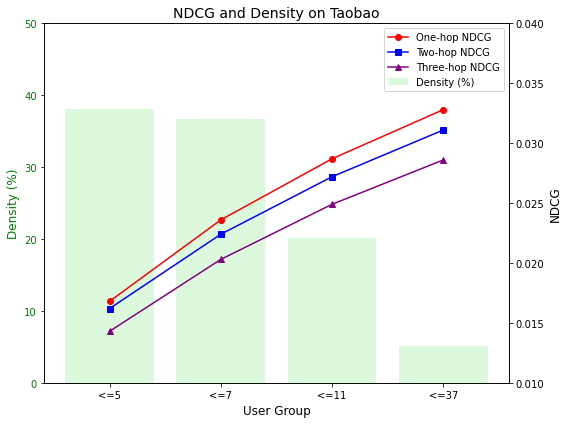

In [46]:

# Plot setup
fig, ax1 = plt.subplots(figsize=(8, 6))

# Density bars
ax1.bar(categories, density_values, alpha=0.3, color='lightgreen', label='Density (%)')
ax1.set_ylabel('Density (%)', fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim(0, 50)  # Adjust limits based on your data

# NDCG lines
ax2 = ax1.twinx()
ax2.plot(categories, onehop_ndcg, marker='o', color='red', label='One-hop NDCG')
ax2.plot(categories, twohop_ndcg, marker='s', color='blue', label='Two-hop NDCG')
ax2.plot(categories, threehop_ndcg, marker='^', color='purple', label='Three-hop NDCG')
ax2.set_ylabel('NDCG', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0.01, 0.04)  # Adjust limits for NDCG values

# Titles and labels
plt.title('NDCG and Density on Taobao', fontsize=14)
ax1.set_xlabel('User Group', fontsize=12)

# Combine legends
lines, labels = ax2.get_legend_handles_labels()
bars, bar_labels = ax1.get_legend_handles_labels()
ax2.legend(lines + bars, labels + bar_labels, loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

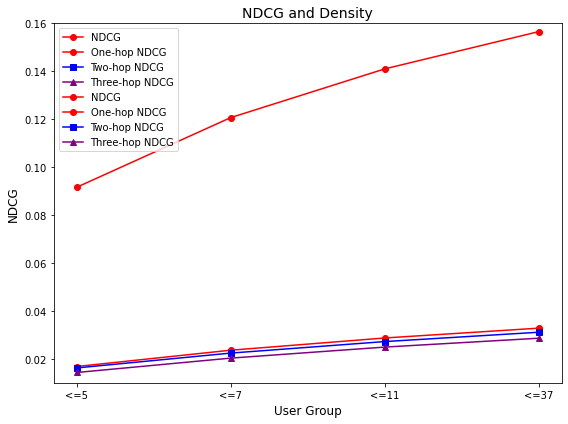

In [52]:
# Plot setup
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot NDCG line

ax1.plot(categories, ndcg_values, marker='o', color='red', label='NDCG')
ax1.set_ylabel('NDCG', fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.plot(categories, onehop_ndcg, marker='o', color='red', label='One-hop NDCG')
ax1.plot(categories, twohop_ndcg, marker='s', color='blue', label='Two-hop NDCG')
ax1.plot(categories, threehop_ndcg, marker='^', color='purple', label='Three-hop NDCG')
ax1.set_ylabel('NDCG', fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax1.set_ylim(0.01, 0.16)  # Adjust y-axis limits for NDCG

# Titles and labels
plt.title('NDCG and Density', fontsize=14)
ax1.set_xlabel('User Group', fontsize=12)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
alpha_1 = {'categories': ['<=5', '<=7', '<=11', '<=37'], 'ndcg': [0.0153, 0.0214, 0.026, 0.0298], 'num_users': [4205, 4054, 2219, 570], 'density': [np.round(0.3806118754525706,2)*100, np.round(0.36694424330195513,2)*100, np.round(0.20085083272990586,2)*100, np.round(0.05159304851556843,2)*100]}
alpha_25 = {'categories': ['<=5', '<=7', '<=11', '<=37'], 'ndcg': [0.0143, 0.0203, 0.0249, 0.0286], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}
alpha_5 = {'categories': ['<=5', '<=7', '<=11', '<=37'], 'ndcg': [0.0044, 0.0067, 0.0085, 0.0101], 'num_users': [4205, 4054, 2219, 570], 'density': [0.3806118754525706, 0.36694424330195513, 0.20085083272990586, 0.05159304851556843]}

In [30]:
categories = alpha_1['categories']
density_values = alpha_1['density']

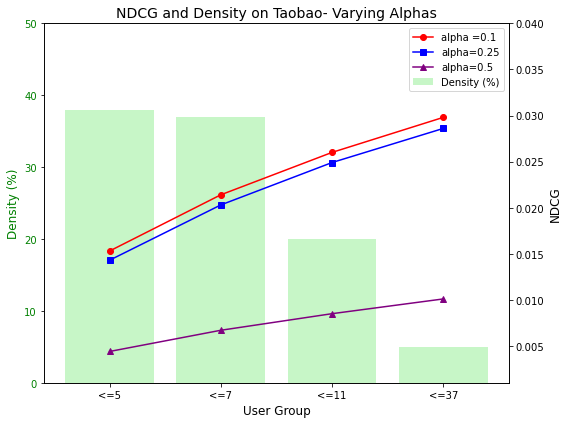

In [31]:

# Plot setup
fig, ax1 = plt.subplots(figsize=(8, 6))

# Density bars
ax1.bar(categories, density_values, alpha=0.5, color='lightgreen', label='Density (%)')
ax1.set_ylabel('Density (%)', fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim(0, 50)  # Adjust limits based on your data

# NDCG lines
ax2 = ax1.twinx()
ax2.plot(categories, alpha_1['ndcg'], marker='o', color='red', label='alpha =0.1')
ax2.plot(categories, alpha_25['ndcg'], marker='s', color='blue', label='alpha=0.25')
ax2.plot(categories, alpha_5['ndcg'], marker='^', color='purple', label='alpha=0.5')
ax2.set_ylabel('NDCG', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0.001, 0.04)  # Adjust limits for NDCG values

# Titles and labels
plt.title('NDCG and Density on Taobao- Varying Alphas', fontsize=14)
ax1.set_xlabel('User Group', fontsize=12)

# Combine legends
lines, labels = ax2.get_legend_handles_labels()
bars, bar_labels = ax1.get_legend_handles_labels()
ax2.legend(lines + bars, labels + bar_labels, loc='upper right')

# Show plot
plt.tight_layout()
plt.show()